## 1ª Lista de Exercícios Prática

### Julia Daniele Moreira da Silva
### Leonardo Silva de Souza


### Questão 01 - Quebra-cabeça 8 peças


#### Classe Problema

In [37]:
import numpy as np

class SlidingPuzzle():
    def __init__(self, num_blocos):
        self.num_blocos = num_blocos

    def _encontra_posicao(self, estado, elemento):
        for i in range(self.num_blocos):
            for j in range(self.num_blocos):
                if estado[i, j] == elemento:
                    return i, j
        return None, None

    def verifica_estados(self, atual, objetivo):
        flag = True
        for i in range(self.num_blocos):
            if flag == False:
                break

            for j in range(self.num_blocos):
                if atual[i, j] != objetivo[i, j]:
                    flag = False;
                    break;

        return flag

    def expande_estado(self, atual):
        novos_estados = []
        linha, coluna = self._encontra_posicao(atual, 0)

        # Cima
        if linha > 0:
            novo_estado = np.copy(atual)
            nova_linha = linha - 1

            bloco_alvo = novo_estado[nova_linha, coluna]
            novo_estado[nova_linha, coluna] = 0
            novo_estado[linha, coluna] = bloco_alvo

            novos_estados.append(novo_estado)

        # Baixo
        if linha < self.num_blocos - 1:
            novo_estado = np.copy(atual)
            nova_linha = linha + 1

            bloco_alvo = novo_estado[nova_linha, coluna]
            novo_estado[nova_linha, coluna] = 0
            novo_estado[linha, coluna] = bloco_alvo

            novos_estados.append(novo_estado)


        # Esquerda
        if coluna > 0:
            novo_estado = np.copy(atual)
            nova_coluna = coluna - 1

            bloco_alvo = novo_estado[linha, nova_coluna]
            novo_estado[linha, nova_coluna] = 0
            novo_estado[linha, coluna] = bloco_alvo

            novos_estados.append(novo_estado)

        # Direita
        if coluna < self.num_blocos - 1:
          novo_estado = np.copy(atual)
          nova_coluna = coluna + 1

          bloco_alvo = novo_estado[linha, nova_coluna]
          novo_estado[linha, nova_coluna] = 0
          novo_estado[linha, coluna] = bloco_alvo

          novos_estados.append(novo_estado)
          
        return novos_estados

    def distanciaChebyshev(self, atual, objetivo):
        total_dist = 0

        for i in range(self.num_blocos):
            for j in range(self.num_blocos):
                elemento = atual[i, j]
                linha, coluna = self._encontra_posicao(objetivo, elemento)

                dist = max(abs(linha - i), abs(coluna - j))
                total_dist += dist

        return total_dist

#### Busca Gulosa

In [38]:
import heapq

class BuscaGulosa():
    def __init__(self, problema):
        self.problema = problema

    def _verifica_visitado(self, estado, estados_visitados):
        for i in estados_visitados:
            if self.problema.verifica_estados(i, estado):
                return True
        return False

    def busca(self, inicio, fim):
        p_fila = []
        
        # H, ID, elemento
        heapq.heappush(p_fila, (0, 0, inicio))

        id_estado = 0
        solucao_encontrada = False
        estados_visitados = []
        cont_estados = 0

        while not len(p_fila) == 0:
            atual = heapq.heappop(p_fila)[2]
            estados_visitados.append(atual)

            if self.problema.verifica_estados(atual, fim):
                solucao_encontrada = True
                break
            else:
                cont_estados += 1
                print("Visitando #", cont_estados)
                novos_estados = self.problema.expande_estado(atual)

                for i in novos_estados:
                    if not self._verifica_visitado(i, estados_visitados):
                        id_estado += 1
                        prioridade = self.problema.distanciaChebyshev(i, fim)

                        print(i, "\nh = ", prioridade)
                        heapq.heappush(p_fila, (prioridade, id_estado, i))

        return solucao_encontrada, estados_visitados, cont_estados

#### Main

In [39]:
problema = SlidingPuzzle(3)

start = np.matrix([[8, 0, 6], [5, 4, 7], [2, 3, 1]])
print(start, "\n********\n")

target = np.matrix([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(target, "\n********\n")

gulosa = BuscaGulosa(problema)
solucao, visitados, steps = gulosa.busca(start, target)

if solucao:
    print(f"Solução encontrada em {steps}")
else:
    print("Solução não encontrada")

[[8 0 6]
 [5 4 7]
 [2 3 1]] 
********

[[0 1 2]
 [3 4 5]
 [6 7 8]] 
********

Visitando # 1
[[8 4 6]
 [5 0 7]
 [2 3 1]] 
h =  14
[[0 8 6]
 [5 4 7]
 [2 3 1]] 
h =  12
[[8 6 0]
 [5 4 7]
 [2 3 1]] 
h =  14
Visitando # 2
[[5 8 6]
 [0 4 7]
 [2 3 1]] 
h =  13
Visitando # 3
[[5 8 6]
 [2 4 7]
 [0 3 1]] 
h =  14
[[5 8 6]
 [4 0 7]
 [2 3 1]] 
h =  14
Visitando # 4
[[8 4 6]
 [5 3 7]
 [2 0 1]] 
h =  15
[[8 4 6]
 [0 5 7]
 [2 3 1]] 
h =  13
[[8 4 6]
 [5 7 0]
 [2 3 1]] 
h =  15
Visitando # 5
[[0 4 6]
 [8 5 7]
 [2 3 1]] 
h =  12
[[8 4 6]
 [2 5 7]
 [0 3 1]] 
h =  14
Visitando # 6
[[4 0 6]
 [8 5 7]
 [2 3 1]] 
h =  13
Visitando # 7
[[4 5 6]
 [8 0 7]
 [2 3 1]] 
h =  13
[[4 6 0]
 [8 5 7]
 [2 3 1]] 
h =  14
Visitando # 8
[[4 5 6]
 [8 3 7]
 [2 0 1]] 
h =  14
[[4 5 6]
 [0 8 7]
 [2 3 1]] 
h =  12
[[4 5 6]
 [8 7 0]
 [2 3 1]] 
h =  14
Visitando # 9
[[0 5 6]
 [4 8 7]
 [2 3 1]] 
h =  11
[[4 5 6]
 [2 8 7]
 [0 3 1]] 
h =  13
Visitando # 10
[[5 0 6]
 [4 8 7]
 [2 3 1]] 
h =  13
Visitando # 11
[[4 5 6]
 [2 8 7]
 [3 0 1]

### Questão 02 - Regressão

#### Leitura dos Dados

In [40]:
import pandas as pd
df = pd.read_csv("Boston.csv")

#### Análise Exploratória


In [41]:
df.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [42]:
df.isna().any()

Unnamed: 0    False
crim          False
zn            False
indus         False
chas          False
nox           False
rm            False
age           False
dis           False
rad           False
tax           False
ptratio       False
black         False
lstat         False
medv          False
dtype: bool

#### Vizualização

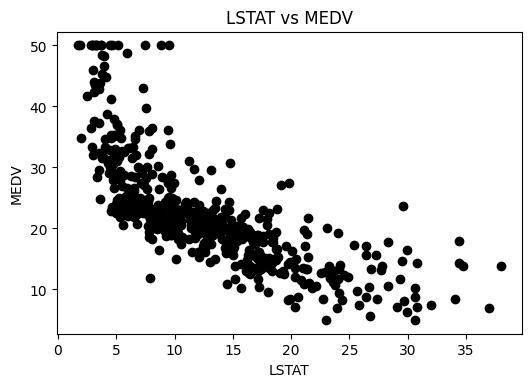

In [43]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 100
plt.scatter(df["lstat"], df["medv"], color="black")
plt.title("LSTAT vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

#### Divição de Dados


In [44]:
import numpy as np

data_x = np.array(list(df["lstat"])).reshape(-1,1)
data_y = np.array(list(df["medv"])).reshape(-1,1)

In [45]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(data_x, data_y, test_size=0.3)
print("Treino:", len(x_treino))
print("Teste:", len(x_teste))

Treino: 354
Teste: 152


#### Criação do Modelo

In [46]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(x_treino,y_treino)
print("Coeficiente: ", modelo.coef_)

Coeficiente:  [[-0.96876479]]


#### Predições


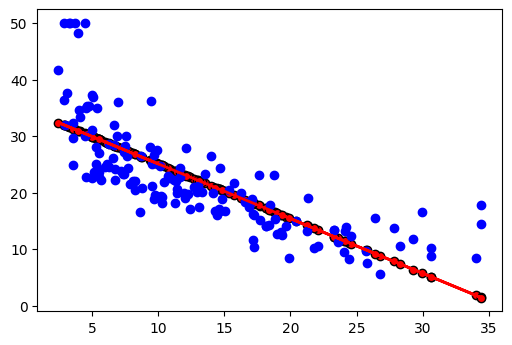

In [47]:
y_predicao = modelo.predict(x_teste)
plt.scatter(x_teste, y_predicao, color="red", edgecolors="black")
plt.scatter(x_teste, y_teste, color="blue")
plt.plot(x_teste, y_predicao, color="red", linewidth=2)
plt.show()

#### Metricas de Avaliação


In [48]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_teste, y_predicao)
print("MSE: ", mse)

MSE:  33.77203688847137


#### Predições -> 25% pessoas baixa renda

In [49]:
lstat = np.array([25]).reshape(-1,1)
mdev = modelo.predict(lstat)
print(lstat)
print(mdev)

[[25]]
[[10.56001914]]


#### Regreção Multipla

coefficient of determination: 0.5441462975864797
intercept: [34.55384088]
slope: [[-0.95004935]]


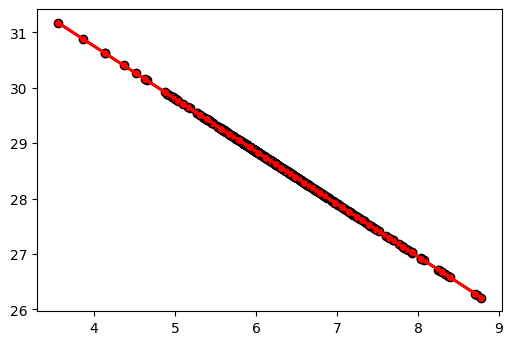

In [61]:
import numpy as np
from sklearn.linear_model import LinearRegression
 
data_x = np.array(list(df["lstat"])).reshape(-1,1)
data_y = np.array(list(df["medv"])).reshape(-1,1)
 
model = LinearRegression().fit(data_x, data_y)
 
print('coefficient of determination:', model.score(data_x, data_y))
print('intercept:', model.intercept_)
print('slope:', model.coef_)
 
data_z = np.array(list(df["rm"])).reshape(-1,1)

previsao_y = model.predict(data_z)
plt.scatter(data_z, previsao_y, color="red", edgecolors="black")
plt.plot(data_z, previsao_y, color="red", linewidth=2)
plt.show()

